In [1]:
import mlflow

In [4]:
!wget https://raw.githubusercontent.com/SirajuddinShaik/helper/main/helper_functions.py


--2024-08-27 10:23:38--  https://raw.githubusercontent.com/SirajuddinShaik/helper/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7691 (7.5K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]   7.51K  --.-KB/s    in 0s      

2024-08-27 10:23:38 (40.0 MB/s) - ‘helper_functions.py.3’ saved [7691/7691]



In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
noise_data = np.load('noise_data_1.npz.npy')
train_1 = np.load('train_1.npz.npy')
train_x , test_x,train_y, test_y = train_test_split( noise_data,train_1, test_size=0.1)

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D,Input,Lambda, Conv2DTranspose, Flatten

2024-08-27 13:02:58.322669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 13:02:58.373447: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 13:02:58.388644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 13:02:58.492790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 13:02:59.415876: W tensorflow/compiler/tf2

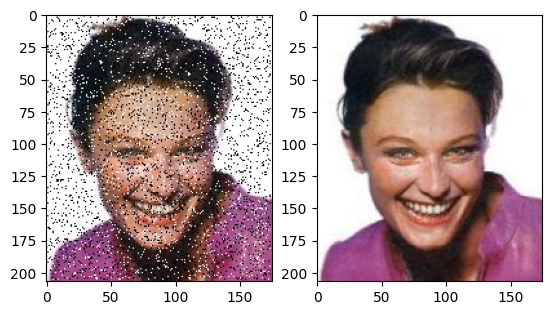

In [4]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(train_x[0])
plt.subplot(1,2,2)
plt.imshow(train_y[0])

In [6]:
layers =[3,16,32,64,128]
upsamplers = [Conv2D(i,3,(2,2),activation="relu") for i in layers[1:]]
downsamplers = [Conv2DTranspose(i,3,(2,2),activation="relu" if i != layers[-1] else "sigmoid") for i in reversed(layers[:-1])]

In [7]:
inputs = Input(shape=(207, 175, 3))
x = Lambda(lambda x:x/255.)(inputs)
for layer in upsamplers:
    x = layer(x)
# x = Flatten()(x)
x = Dense(64)(x)
x = Dense(64)(x)
x = Dense(128)(x)
for layer in downsamplers:
    x = layer(x)


model_1 = tf.keras.Model(inputs,x)
model_1.summary()

2024-08-27 10:09:35.139617: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20974 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 103, 87, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 43, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12, 10, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12, 10, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12, 10, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 21, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 51, 43, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 103, 87, 16)    │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 207, 175, 3)    │           435 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,491 (841.76 KB)

 Trainable params: 215,491 (841.76 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
def rmse_loss(y_true, y_pred):
    """
    Calculate the RMSE between two images.

    Parameters:
    y_true (tf.Tensor): The ground truth image tensor.
    y_pred (tf.Tensor): The predicted image tensor.

    Returns:
    tf.Tensor: The RMSE loss value.
    """
    # Calculate the Mean Squared Error (MSE)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Calculate the Root Mean Squared Error (RMSE)
    rmse = tf.sqrt(mse)
    
    return rmse

In [11]:
model_1.compile(
    loss = "mse",
    optimizer = "adam",
)

In [12]:
hist_1 = model_1.fit(
    train_x,train_y,
    batch_size=8,
    epochs=50,
    validation_data = (test_x,test_y),
    callbacks = [tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",  # Metric to monitor for improvement
            min_delta=0.001,  # Minimum change in monitored metric to qualify as improvement
            patience=5,  # Number of epochs to wait for improvement before stopping
            verbose=1,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
            mode="auto",  # Whether to monitor for min ('min'), max ('max'), or no specific direction ('auto')
            baseline=None,  # Baseline value for the monitored metric to compare against
            restore_best_weights=True,  # Whether to restore model weights from the epoch with the best monitored metric
        )]
)

2024-08-27 10:10:00.853098: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3126688425 exceeds 10% of free system memory.


Epoch 1/50


I0000 00:00:1724753409.561167    7762 service.cc:146] XLA service 0x7f3f6c0030a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724753409.561426    7762 service.cc:154]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-08-27 10:10:09.642455: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-27 10:10:09.931488: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
2024-08-27 10:10:11.792345: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 316 bytes spill stores, 316 bytes spill loads

2024-08-27 10:10:11.967845: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion

  71/3597 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 15742.5869  

I0000 00:00:1724753415.099380    7762 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3595/3597 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5212.2476

2024-08-27 10:10:24.151637: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 316 bytes spill stores, 316 bytes spill loads

2024-08-27 10:10:24.482987: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 320 bytes spill stores, 320 bytes spill loads



3597/3597 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5211.7529

2024-08-27 10:10:30.661691: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 320 bytes spill stores, 320 bytes spill loads

2024-08-27 10:10:30.775569: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 316 bytes spill stores, 316 bytes spill loads



3597/3597 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 5211.5059 - val_loss: 3888.2588
Epoch 2/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3839.0774 - val_loss: 3788.8699
Epoch 3/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3770.0527 - val_loss: 3760.5852
Epoch 4/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3730.4270 - val_loss: 3702.2834
Epoch 5/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3653.1582 - val_loss: 4037.6204
Epoch 6/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3666.0078 - val_loss: 3723.6033
Epoch 7/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3659.8325 - val_loss: 3644.6074
Epoch 8/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3608.8633 - val_loss: 3649.2244
Epoch 9/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3616.0181 - val_loss: 3630.6211
Epoch 10/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3620.3936 - val_loss: 3624.9297
Epoch 11/50
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3605.5

In [16]:
mlflow.set_experiment("First Experiment")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

with mlflow.start_run():
    # mlflow.log_params(hist_1)
    mlflow.log_metrics({
        'loss': 3597
    })
    mlflow.tensorflow.log_model(model_1, "Denoising Auto Encoder")  

2024/08/27 10:16:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/27 10:16:21 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp3ohgi11b/model, flavor: tensorflow). Fall back to return ['tensorflow==2.17.0', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/08/27 10:16:21 WARNING mlflow.models.model: Input example s

In [5]:
layers =[3,16,32,64,128]
upsamplers = [Conv2D(i,3,(2,2),activation="relu") for i in layers[1:]]
downsamplers = [Conv2DTranspose(i,3,(2,2),activation="relu" if i != layers[-1] else "sigmoid") for i in reversed(layers[:-1])]

inputs = Input(shape=(207, 175, 3))
x = Lambda(lambda x:x/255.)(inputs)
for layer in upsamplers:
    x = layer(x)
# x = Flatten()(x)
x = Dense(128)(x)
x = Dense(128)(x)
x = Dense(128)(x)
for layer in downsamplers:
    x = layer(x)


model_2 = tf.keras.Model(inputs,x)
model_2.summary()

2024-08-27 10:40:34.075404: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20974 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 103, 87, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 43, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12, 10, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12, 10, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12, 10, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 21, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 51, 43, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 103, 87, 16)    │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 207, 175, 3)    │           435 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,291 (954.26 KB)

 Trainable params: 244,291 (954.26 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_2.compile(
    loss = "mse",
    optimizer = "adam",
)
hist_2 = model_2.fit(
    train_x,train_y,
    batch_size=8,
    epochs=150,
    validation_data = (test_x,test_y),
    callbacks = [tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",  # Metric to monitor for improvement
            min_delta=0.001,  # Minimum change in monitored metric to qualify as improvement
            patience=5,  # Number of epochs to wait for improvement before stopping
            verbose=1,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
            mode="auto",  # Whether to monitor for min ('min'), max ('max'), or no specific direction ('auto')
            baseline=None,  # Baseline value for the monitored metric to compare against
            restore_best_weights=True,  # Whether to restore model weights from the epoch with the best monitored metric
        ),tf.keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss",  # Metric to monitor for plateau
            factor=0.2,  # Factor by which to reduce the learning rate
            patience=3,  # Number of epochs to wait before reducing the learning rate
            min_lr=0.0001,  # Minimum learning rate to reach
            verbose=1,  # Verbosity mode
        )]
)

2024-08-27 10:41:05.845753: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3126688425 exceeds 10% of free system memory.


Epoch 1/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 849.3554 - val_loss: 677.8956 - learning_rate: 0.0010
Epoch 2/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 534.3787 - val_loss: 429.8169 - learning_rate: 0.0010
Epoch 3/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 457.6307 - val_loss: 440.2437 - learning_rate: 0.0010
Epoch 4/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 397.3804 - val_loss: 367.5971 - learning_rate: 0.0010
Epoch 5/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 367.8370 - val_loss: 324.8528 - learning_rate: 0.0010
Epoch 6/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 347.7634 - val_loss: 388.1348 - learning_rate: 0.0010
Epoch 7/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 321.2663 - val_loss: 329.9877 - learning_rate: 0.0010
Epoch 8/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 300.2166 - val_loss: 265.8075 - learning_rate: 0.0010
Epoch 9/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


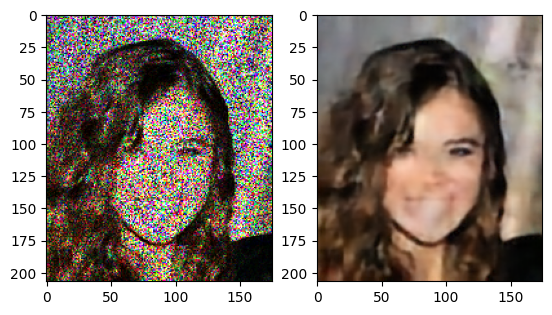

In [10]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.imshow(test_x[15])
plt.subplot(1,2,2)
plt.imshow(np.array(model_2.predict(np.expand_dims(test_x[15],axis=0))[0],dtype="int"))

In [19]:
test_x[1].shape

(207, 175, 3)

In [21]:
model_2.predict(np.expand_dims(test_x[1],axis=0))[0].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(207, 175, 3)

In [13]:
mlflow.set_experiment("First Experiment")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

with mlflow.start_run():
    # mlflow.log_params(hist_1)
    mlflow.log_metrics({
        'loss': 191.8308
    })
    mlflow.tensorflow.log_model(model_2, "Denoising Auto Encoder")  

2024/08/27 10:53:05 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/27 10:53:08 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp0gfenyfl/model, flavor: tensorflow). Fall back to return ['tensorflow==2.17.0', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/08/27 10:53:08 WARNING mlflow.models.model: Input example s

In [14]:
model_2.save("denoising_autoencoder.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


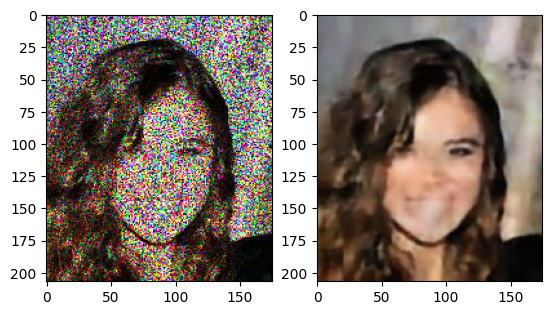

In [18]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(test_x[15])
plt.subplot(1,2,2)
plt.imshow(np.array(model.predict(np.expand_dims(test_x[15],axis=0))[0],dtype="int"))

In [4]:
layers =[3,16,32,64,128]
upsamplers = [Conv2D(i,3,(2,2),activation="relu") for i in layers[1:]]
downsamplers = [Conv2DTranspose(i,3,(2,2),activation="relu" if i != layers[0] else "sigmoid") for i in reversed(layers[:-1])]

inputs = Input(shape=(207, 175, 3))
x = Lambda(lambda x:x/255.)(inputs)
for layer in upsamplers:
    x = layer(x)
# x = Flatten()(x)
x = Dense(128)(x)
x = Dense(128)(x)
x = Dense(128)(x)
for layer in downsamplers:
    x = layer(x)
x = Lambda(lambda x:x*255.)(x)

model_3 = tf.keras.Model(inputs,x)
model_3.summary()

2024-08-27 13:03:01.794303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20974 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:35:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 207, 175, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 103, 87, 16)    │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 43, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12, 10, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12, 10, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12, 10, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 21, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 51, 43, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 103, 87, 16)    │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 207, 175, 3)    │           435 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 207, 175, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,291 (954.26 KB)

 Trainable params: 244,291 (954.26 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_3.compile(
    loss = "mse",
    optimizer = "adam",
)
hist_3 = model_3.fit(
    train_x,train_y,
    batch_size=8,
    epochs=150,
    validation_data = (test_x,test_y),
    callbacks = [tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",  # Metric to monitor for improvement
            min_delta=0.001,  # Minimum change in monitored metric to qualify as improvement
            patience=5,  # Number of epochs to wait for improvement before stopping
            verbose=1,  # Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
            mode="auto",  # Whether to monitor for min ('min'), max ('max'), or no specific direction ('auto')
            baseline=None,  # Baseline value for the monitored metric to compare against
            restore_best_weights=True,  # Whether to restore model weights from the epoch with the best monitored metric
        ),tf.keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss",  # Metric to monitor for plateau
            factor=0.2,  # Factor by which to reduce the learning rate
            patience=3,  # Number of epochs to wait before reducing the learning rate
            min_lr=0.000001,  # Minimum learning rate to reach
            verbose=1,  # Verbosity mode
        )]
)

Epoch 1/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 201.0946 - val_loss: 203.4304 - learning_rate: 0.0010
Epoch 2/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 201.5732 - val_loss: 195.9456 - learning_rate: 0.0010
Epoch 3/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 200.1129 - val_loss: 223.0849 - learning_rate: 0.0010
Epoch 4/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 200.8280 - val_loss: 198.7243 - learning_rate: 0.0010
Epoch 5/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 198.8572 - val_loss: 195.7399 - learning_rate: 0.0010
Epoch 6/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 197.0795 - val_loss: 201.5038 - learning_rate: 0.0010
Epoch 7/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 198.2267 - val_loss: 198.1802 - learning_rate: 0.0010
Epoch 8/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 195.9208 - val_loss: 194.7976 - learning_rate: 0.0010
Epoch 9/150
3597/3597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 

In [10]:
mlflow.set_experiment("First Experiment")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

with mlflow.start_run():
    # mlflow.log_params(hist_1)
    mlflow.log_metrics({
        'loss': 171.6533
    })
    mlflow.tensorflow.log_model(model_3, "Denoising Auto Encoder")  

2024/08/27 13:31:42 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/08/27 13:31:45 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmphrede84s/model, flavor: tensorflow). Fall back to return ['tensorflow==2.17.0', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/08/27 13:31:45 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/27 13:31:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run adaptable-bug-547 at: http://127.0.0.1:5000/#/experiments/580938022485044162/runs/7e6cc90021e44aeda238988a098e49b4.
2024/08/27 13:31:45 INFO mlflow.tracking._tracking_service.client: 🧪 View 

In [11]:
model_3.save("bestmodel.h5")

In [12]:
layers =[3,16,32,64,128]
upsamplers = [Conv2D(i,3,(2,2),activation="relu") for i in layers[1:]]
downsamplers = [Conv2DTranspose(i,3,(2,2),activation="relu" if i != layers[-1] else "sigmoid") for i in reversed(layers[:-1])]

inputs = Input(shape=(207, 175, 3))
x = Lambda(lambda x:x/255.)(inputs)
for layer in upsamplers:
    x = layer(x)
# x = Flatten()(x)
x = Dense(128)(x)
x = Dense(128)(x)
x = Dense(128)(x)
for layer in downsamplers:
    x = layer(x)


model = tf.keras.Model(inputs,x)

model.load_weights("bestmodel.h5")

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
plt.imshow(test_x[15])
plt.subplot(1,3,2)
plt.imshow(np.array(model.predict(np.expand_dims(test_x[15],axis=0))[0],dtype="int"))